# CASE STUDY 4C: TOPIC MODELING OF DOCUMENTS USING R 

<img src="https://ithaka-labs.s3.amazonaws.com/static-files/images/tdm/tdmdocs/CC_BY.png" align=left alt="CC BY license logo" /><br /><br />
Created by [Manika Lamba](http://manika-lamba.github.io) under [Creative Commons CC BY License](https://creativecommons.org/licenses/by/4.0/)<br />
**For questions/comments, email lambamanika07@gmail.com**<br />
____

#### Topic modeling is a probability-based algorithm that will result in different results everytime you run the code. Therefore, you might observe the outputs of the cell may differ from the results described in the book.

In [1]:
#Load libraries
library(tidyverse)
library(tidytext)
library(stm)
library(ggplot2)
library(RColorBrewer)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.1     v purrr   0.3.4
v tibble  3.0.1     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning message:
"package 'stm' was built under R version 3.6.3"stm v1.3.5 suc

In [2]:
#Load dataset
data <- read.csv("https://raw.githubusercontent.com/textmining-utl/chapter4/master/4c_dataset.csv?token=ARBWLQ3RCKTIK7PFAPDEUD3ACZJYA")

In [3]:
#Set seed
set.seed(123)

In [4]:
#Text pre-processing
processed <- textProcessor(data$Title,removepunctuation = TRUE,metadata = data)
    out <- prepDocuments(processed$documents,processed$vocab,processed$meta)
    docs <- out$documents
    vocab <- out$vocab
    meta <- out$meta

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 
Removing 157 of 280 terms (157 of 933 tokens) due to frequency 
Your corpus now has 98 documents, 123 terms and 776 tokens.

In [5]:
#Running Structural Topic Modeling (STM)
STM <- stm(documents = out$documents,
           vocab = out$vocab,
           K = 5,
           prevalence =~ Year,
           max.em.its = 75,
           data = out$meta,
           init.type = "Spectral",
           verbose = FALSE)

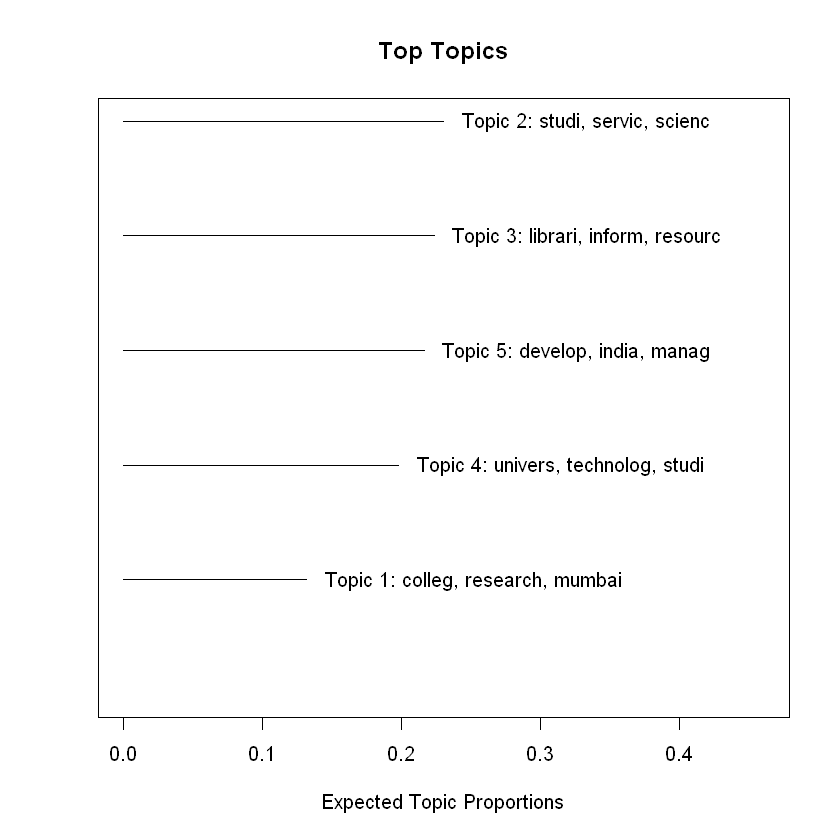

In [6]:
#Different ways to plot topics with document-topic proportion
#Method 1: Plotting top words using stm package
plot(STM)

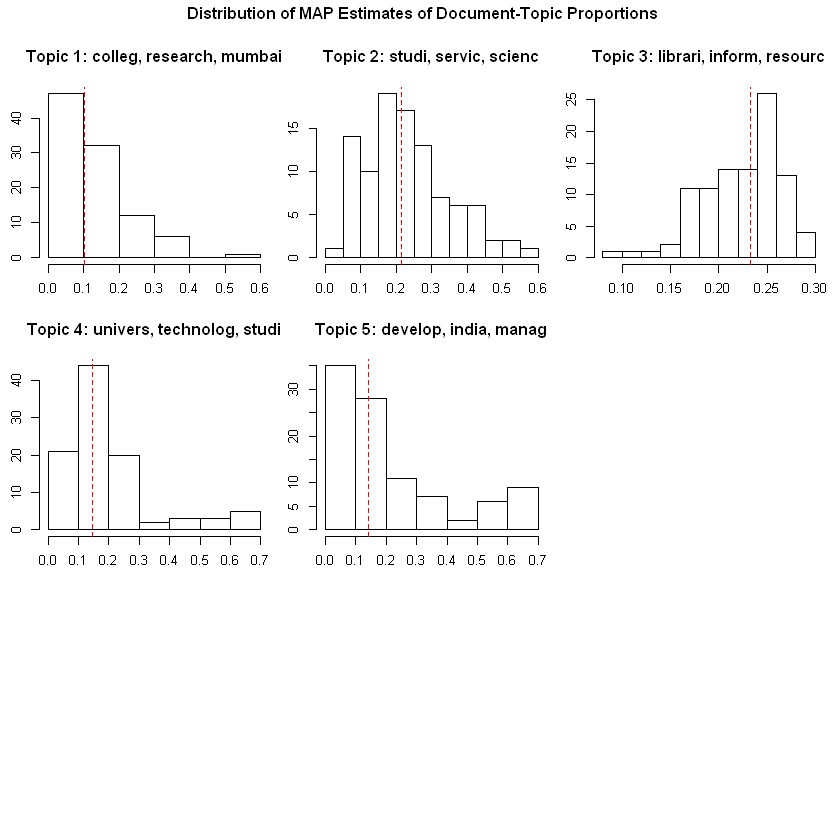

In [7]:
#Method 2: Plotting MAP histogram using stm package
plot(STM, type="hist")

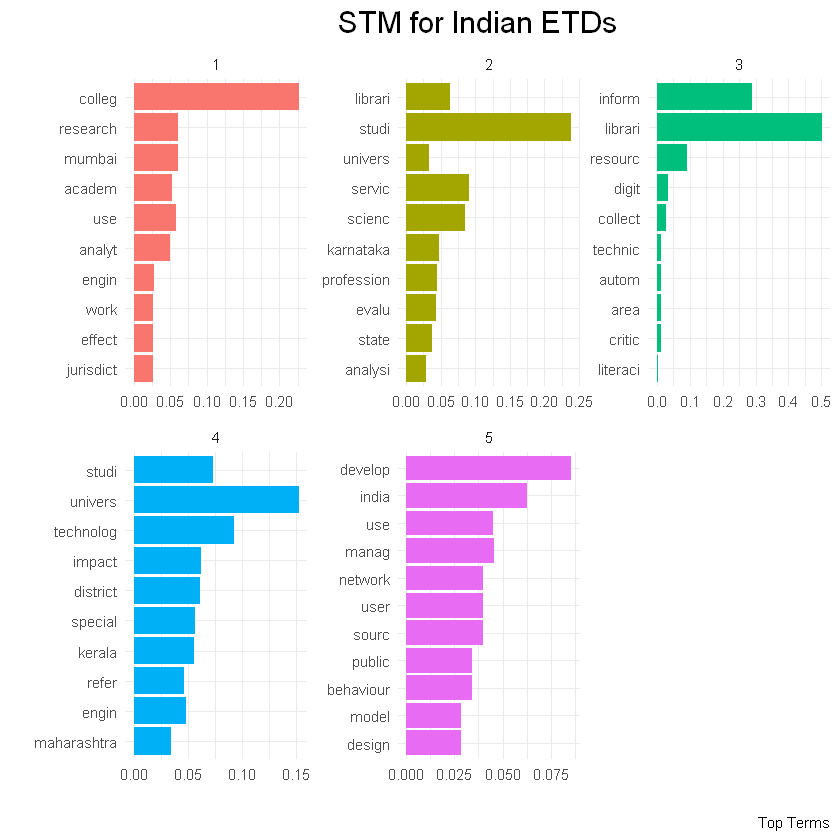

In [8]:
#Method 3: Visualizing topic model using ggplot2
topics <- tidy(STM, matrix = "beta")

top_terms <- topics %>%
    group_by(topic) %>%
    top_n(10, beta) %>%
    ungroup() %>%
    arrange(topic, -beta)

top_terms %>%
    mutate(term = reorder(term, beta)) %>%
    ggplot(aes(term, beta, fill = factor(topic))) +
    geom_col(show.legend = FALSE) +
    facet_wrap(~ topic, scales = "free") +
    theme_minimal()+
    theme(plot.title = element_text(hjust = 0.5, size = 18))+
    labs(title="STM for Indian ETDs", caption="Top Terms")+
    ylab("")+
    xlab("")+
    coord_flip()

In [9]:
#Method 4: Interactive Visualization
ldavis <- toLDAvis(STM, docs, R = 5,
                       plot.opts = list(xlab = "PC1", ylab ="PC2"),
                       lambda.step = 0.1,
                       out.dir = "LDAvis",
                       open.browser = interactive(),
                       as.gist = FALSE,
                       reorder.topics = TRUE)

Warning message in dir.create(out.dir):
"'LDAvis' already exists"Loading required namespace: servr


In [10]:
#Understanding topics through top 5 representative documents
findThoughts(STM, texts = data$Title, n = 5, topics = 1)
findThoughts(STM, texts = data$Title, n = 5, topics = 2)
findThoughts(STM, texts = data$Title, n = 5, topics = 3)
findThoughts(STM, texts = data$Title, n = 5, topics = 4)
findThoughts(STM, texts = data$Title, n = 5, topics = 5)

Warning message in findThoughts(STM, texts = data$Title, n = 5, topics = 1):
"texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future."


 Topic 1: 
 	 Use of online journals by the faculty members working at the medical institutions in Bangalore city : a study
 	College library effectiveness study with special reference to the Tinsukia and Dibrugarh district
 	College library effectiveness study with special reference to the tinsukia and dibrugarh district
 	A study of web 2 technology adoption by librarians working in academic colleges in maharashtra
 	Attitude of library professionals towards the use and acceptance of information technology in library activities : a study of academic college libraries under the jurisdiction of mumbai university

Warning message in findThoughts(STM, texts = data$Title, n = 5, topics = 2):
"texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future."


 Topic 2: 
 	 A comparative study of citation analysis among Five online journals in library and Information science a scientometric study
 	Quality library services in the department of library and information science of universities of the Maharashtra state : a study
 	Job analysis of library professionals in science and technology institutes of assam an evaluative study
 	Quality library services in the department of library and information science of universities of the maharashtrastate : a study
 	Recency pattern of citations an analytical study of citations of articles published in Library and Information Science

Warning message in findThoughts(STM, texts = data$Title, n = 5, topics = 3):
"texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future."


 Topic 3: 
 	 An investigation in to the impact of e resources in modern Library and Information Centers
 	Impact of information technology on the collection development in university libraries of assam : a study
 	Impact of E resources on collection development in Special Libraries in Karnataka
 	An Evaluative Study of E-Journal Collection Management Transition Trend and Technology: A Survey of University Libraries of Delhi
 	Study the attitude of B.Ed Student teachers towards digital library and e resources of jalgaon District m s

Warning message in findThoughts(STM, texts = data$Title, n = 5, topics = 4):
"texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future."


 Topic 4: 
 	 Study of the application of information technology in the treatment and preparation of medicine in ayurveda with special reference to Kerala
 	A survey of organization administration and utilization of university libraries in Kerala with special reference to Calicut university library
 	A study of the application of information technology in tribal medicine in Kerala with regard to forest medicinal plants
 	A study of the scientific productivity and information use pattern of scientists in the context of new information technology with special reference to universities in Kerala
 	Information literacy of research scholars of universities in Kerala

Warning message in findThoughts(STM, texts = data$Title, n = 5, topics = 5):
"texts are of type 'factor.'  Converting to character vectors.  Use 'as.character' to avoid this warning in the future."


 Topic 5: 
 	 Design And Development Of Networking Model For Agricultural Library And Information System In India
 	Preception Awareness Knowledge Information needs and source use behaviour of general public A case study with references to health Information
 	Design and Development of Collaborative Model of Health Information Literacy in Jammu Division
 	Developing neural network architecture based SDI model for libraries and information centres
 	Information seeking behaviour of users of management institute libraries in Pune

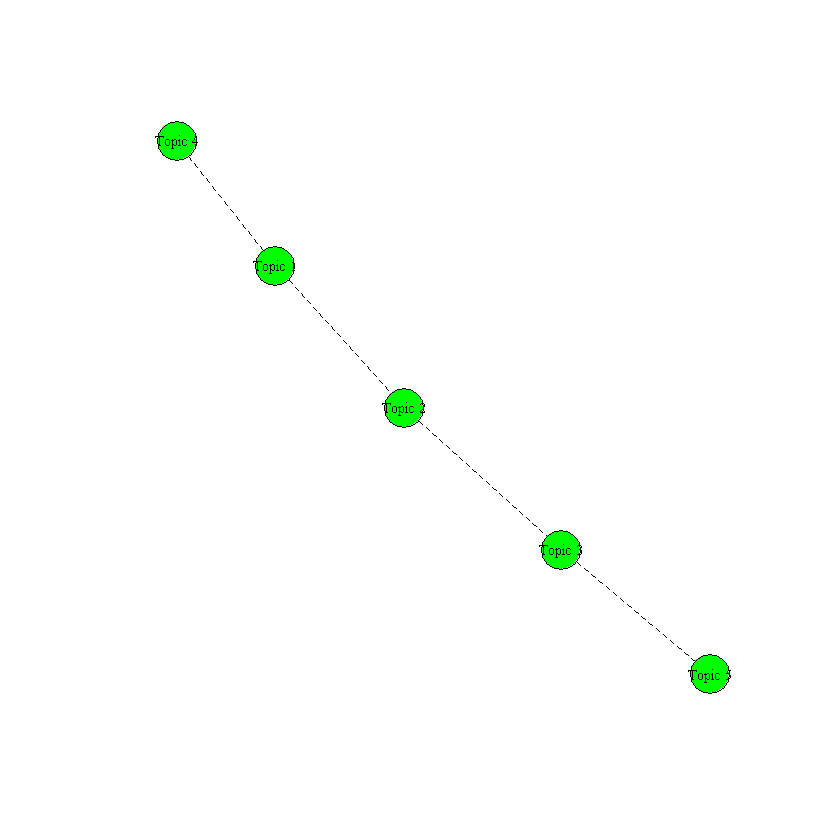

In [11]:
#Topic correlation
topicor <- topicCorr(STM)
plot(topicor)